# 1) First part - pre-procesing data

The data below show customers transaction from recent online and in-store sales. By using data mining method it will be conduct research to infer any insights and conclusions about customer purchasing behavior. 

**Data Dictionery**:

*In-store Column Mapping:*
<ul>
<li>1: in-store purchases</li>
<li>0: online purchases</li>
</ul>

*Region Column Mapping:*
<ul>
<li>1: North</li>
<li>2: South</li>
<li>3: East</li>
<li>4: West</li>
</ul>

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### The Data Set

In [3]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


### Examining and cleaning data

In [4]:
# Check basic statistic on data set
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
# Information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


The entire data set doesn't have any null value, and type of the data here are all numerical.

In [6]:
# Check number of differnt values in each column 
data.nunique()

in-store        2
age            68
items           8
amount      56112
region          4
dtype: int64

In [7]:
# Look on value in each column and count how many each of them is there
for column in data:
    print(data[column].unique())

[0 1]
[37 35 45 46 33 24 43 66 51 47 44 32 48 34 20 58 49 55 31 53 21 42 40 28
 59 41 74 19 54 57 30 27 38 26 36 22 39 69 81 65 61 62 78 29 67 80 73 25
 52 50 70 56 60 64 71 63 84 72 83 79 18 23 68 75 85 76 77 82]
[4 2 3 6 5 7 1 8]
[ 281.03  219.51 1525.7  ...  558.82  335.32  527.12]
[2 4 3 1]


In [8]:
for column in data:
    print(data[column].value_counts())

1    40000
0    40000
Name: in-store, dtype: int64
53    1829
32    1789
42    1785
36    1784
34    1783
      ... 
75     334
76     329
79     321
18     223
85     185
Name: age, Length: 68, dtype: int64
4    11596
6    11522
3    11487
7    11378
2    11290
5    11238
8     5788
1     5701
Name: items, dtype: int64
1914.000    9
1129.500    8
1073.500    8
1487.400    8
1318.300    7
           ..
46.762      1
630.080     1
853.340     1
186.260     1
192.000     1
Name: amount, Length: 56112, dtype: int64
4    26000
2    20000
3    18000
1    16000
Name: region, dtype: int64


In [9]:
 # Selecting duplicate rows except first occurrence based on all columns
duplicates_data = data[data.duplicated()]
print(duplicates_data)

# Show how many line we have with duplicates

print(f'\nThere is: {str(len(duplicates_data))} line with duplicates.')

       in-store  age  items   amount  region
17858         0   76      6   283.61       2
26112         0   67      4   320.41       2
29343         1   23      2  1019.50       4
33834         1   38      3  1993.80       1
34214         1   31      5  1488.10       4
34706         0   39      5  1268.00       4
35971         0   38      7   391.51       2
43958         1   22      1  1303.20       4
44308         1   26      5  1495.70       4
45164         0   79      6   342.28       2
47414         0   27      6  1555.10       4
51600         0   56      2  1941.70       4
52013         1   50      5  1889.40       1
53652         0   29      2   144.43       2
58454         0   76      1   259.44       2
59539         1   49      2  1162.00       4
59859         0   30      7  2535.10       4
61439         1   32      4  1106.10       4
63970         1   42      5  1731.10       4
75506         0   44      2  1756.70       4
78688         1   40      2  1080.60       1

There is:

#### Decision to use data without duplicates
Because duplicates are mostly for transactions with more than one item it's unlikely to see exactly the same purchase made by the same costumer. Especially without having a data about date of given purchase. So this duplicates could be made by mistake. 

In [10]:
# Looking for some missing value
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


<AxesSubplot:>

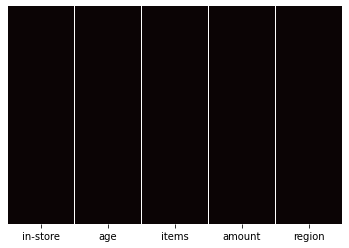

In [11]:
# Visualise if there are any missing value in data set
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='mako')

There is no missing value in the data set.

In [12]:
total_cells = np.product(data.shape)
missing_values_count = data.isnull().sum()
total_missing = missing_values_count.sum()
total_cells, total_missing

(400000, 0)

In [13]:
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

#### New data set without duplicates

In [14]:
# Droping duplicates 
new_data = data.drop_duplicates()
new_data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [15]:
new_data.shape

(79979, 5)

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [17]:
new_data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


## First Conlusions

### Analysis made on the data set without duplicates
People who buy products are between 18-85 years old, where the average is 46 years old. 
Number of item purchase by clients is between 1-8 product for transaction, with average is 4 product per transaction. 
Purchase made in-store are almost equal to purchase made online.
Costumers spent between 5 to 3000 per transaction, with average 836 per transaction.

# Visualizing the data 

#### Relationship analysis

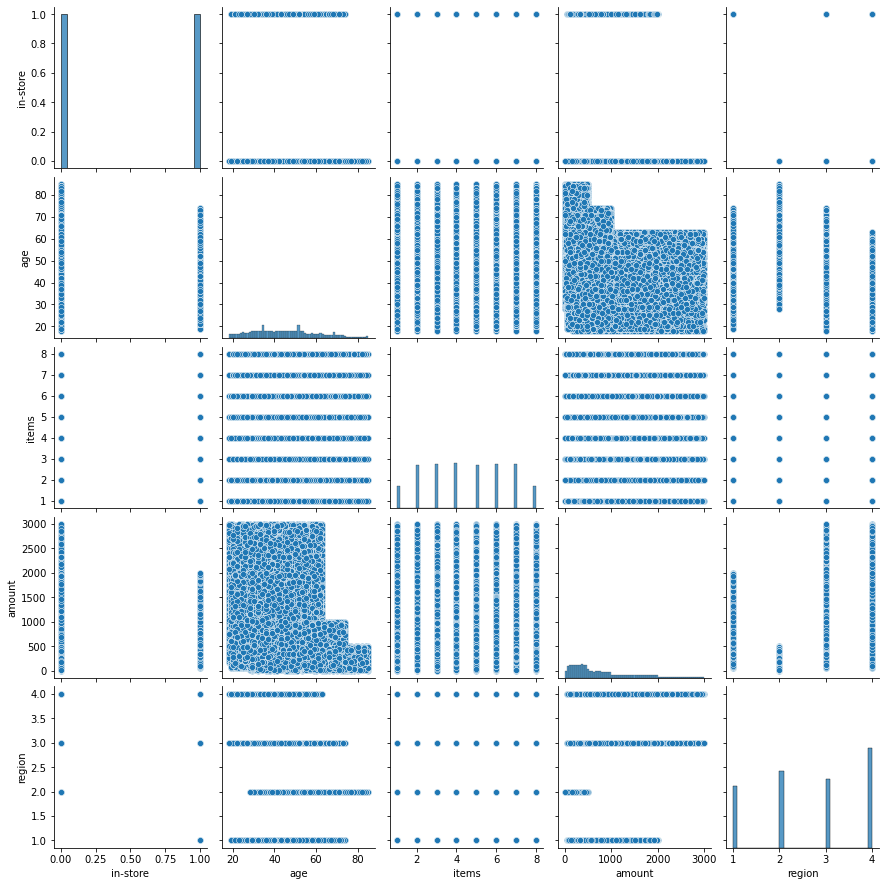

In [18]:
sns.pairplot(new_data);

In [19]:
# Division into numerical and categorical value
new_data_num = new_data[['age','amount']]
new_data_cat = new_data[['in-store','region','items']]

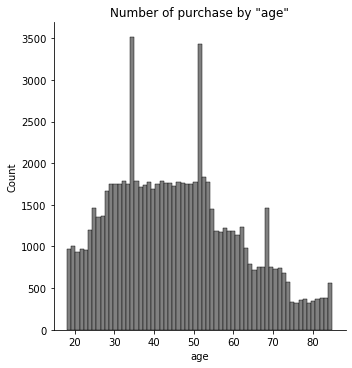

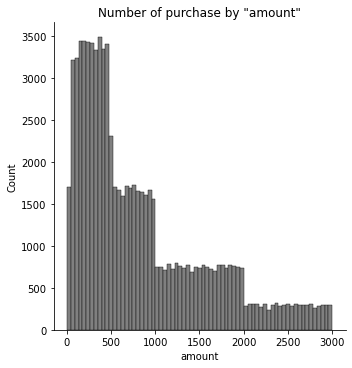

In [20]:
# Visualization of numerical data
for name in new_data_num.columns:
    sns.displot(x=new_data_num[name], data=new_data_num, facecolor='grey',edgecolor='black')
    plt.title('Number of purchase by "' +name +'"');

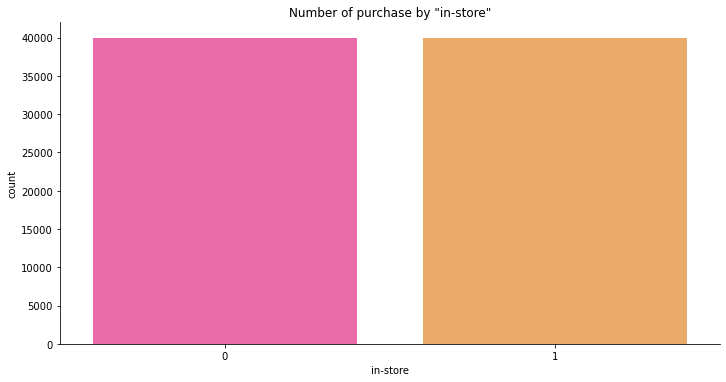

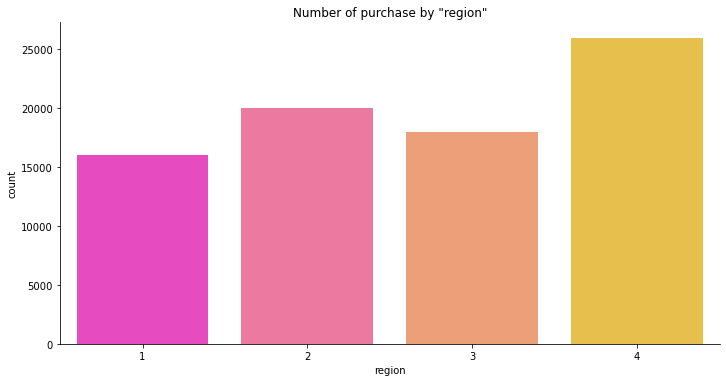

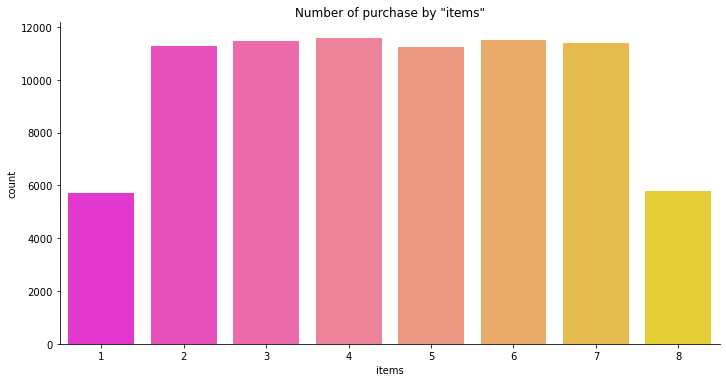

In [21]:
# Visualization of categorical data
for name in new_data_cat.columns:
    sns.catplot(x=new_data_cat[name], data=new_data_cat, kind='count', aspect=2, palette='spring')
    plt.title('Number of purchase by "' +name +'"');

### Analysis 'In-store' purchase

In [22]:
new_data.groupby('in-store')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
in-store,,,,,,,,
0,39989.0,897.546576,880.146928,5.0047,228.1500,441.89,1542.7,3000.0
1,39990.0,774.106421,508.118520,50.0500,368.6225,688.18,1024.4,1999.9


In [23]:
table = new_data.pivot_table('amount', 'in-store', 
                               aggfunc=np.sum, 
                               margins=True)
table.index=[["In-store purchases", "Online purchases",'Total']]
table.columns=['Total income from all transaction']
table.apply(lambda s: s.apply(lambda x: format(x, 'f')))
table.round(2)

,Total income from all transaction
In-store purchases,35891990.01
Online purchases,30956515.78
Total,66848505.79


### Conclusion about 'in-store' purchases
More income comes from selling in a stationary store.

The prices in stationery store are between 5 - 3000, and online are from 50 up to 2000. 
Customers spend more on average in one transaction in-store than online purchases.

### SCATTER PLOTS
###### Use to show relationship beetween Age and Amount

In [24]:
new_data_sample = new_data.sample(150)

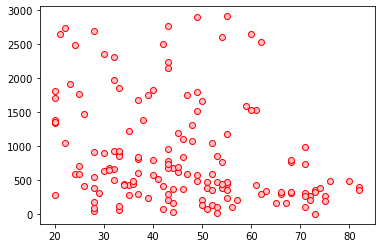

In [25]:
np.random.seed(10) 
x = new_data_sample["age"]
y = new_data_sample["amount"]
plt.scatter(x,y, marker = 'o', c='pink', edgecolors='red');


## Analysis 'Amount'

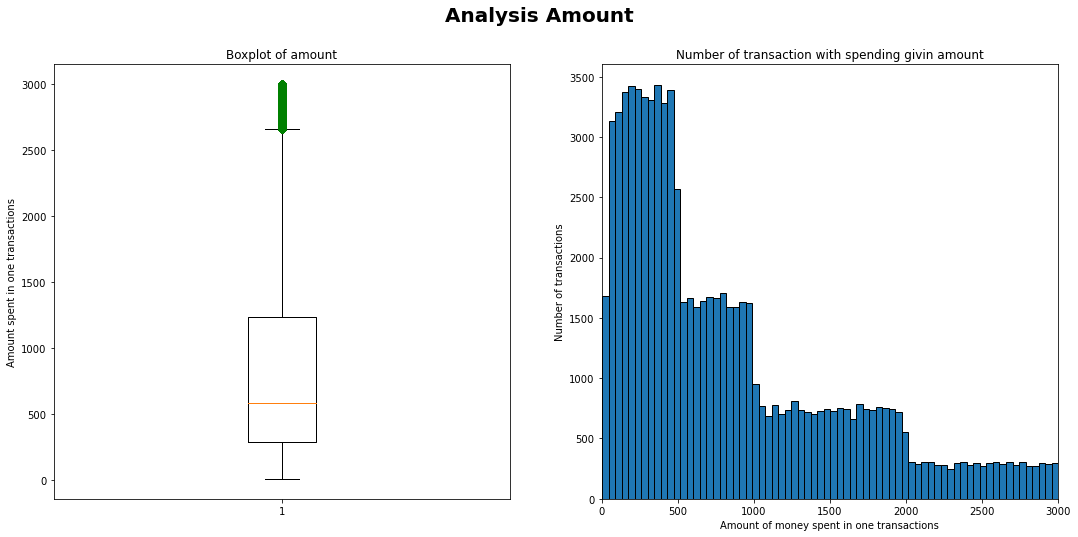

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                     ncols=2,
                     figsize=(18,8))

ax1.boxplot(new_data['amount'],0,'gD')
ax1.set_ylabel('Amount spent in one transactions')
#ax1.set_xlabel('Amount')
ax1.set_title('Boxplot of amount');
ax2.hist(new_data['amount'], 
         bins=70, 
         edgecolor='black')
ax2.set_xlim(0,3000);
ax2.set(title='Number of transaction with spending givin amount', 
        xlabel='Amount of money spent in one transactions', 
        ylabel='Number of transactions')
fig.suptitle('Analysis Amount', 
             fontsize=20, 
             fontweight='bold');

### Dealing with outliers value

In [27]:
list_amount = new_data['amount']
a_number = 2650

larger_elements = [element for element in list_amount if element > a_number]
print(len(larger_elements), ',' ,sum(larger_elements))

2364 , 6677820.500000019


In [28]:
sum(new_data['amount'])

66848505.790499866

In [29]:
print(sum(larger_elements) / sum(new_data['amount']) * 100)

9.989483565912453


Value of outliers amount is almost 10% value of the total value generated by this store. So it meaningful and doesn't need to be remove.

### Add column with amount sorted in a group

In [30]:
new_data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [31]:
new_data['AmountGroup'] = pd.cut(new_data['amount'], 
                                bins = [0,500,1000,1500,2000,2500,3000], 
                                labels = ['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500+'])

<ipython-input-31-567096e90db0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['AmountGroup'] = pd.cut(new_data['amount'],


### Add column with age sorted in a group

In [32]:
new_data['AgeGroup'] = pd.cut(new_data['age'],
                              bins=[17,26,38,50,66,85],
                              labels = ['young adult','adult','middle-age adult','older adult','eldery'])

<ipython-input-32-370c89085f93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['AgeGroup'] = pd.cut(new_data['age'],


In [33]:
new_data.head()

,in-store,age,items,amount,region,AmountGroup,AgeGroup
0,0,37,4,281.03,2,0-500,adult
1,0,35,2,219.51,2,0-500,adult
2,1,45,3,1525.70,4,1500-2000,middle-age adult
3,1,46,3,715.25,3,500-1000,middle-age adult
4,1,33,4,1937.50,1,1500-2000,adult


In [34]:
table = new_data.pivot_table('amount', 'AmountGroup', 'in-store', 
                               aggfunc=np.sum, 
                               margins=True)
table.index=[['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500+','Total']]
table.columns=[["In-store", "Online",'Total']]
table.iloc[:6,:2].apply(lambda s: s.apply(lambda x: format(x, 'f')))

,In-store,Online
0-500,5855710.563500,3861921.997000
500-1000,2590333.450000,11771209.380000
1000-1500,4393569.700000,6364957.600000
1500-2000,6173962.300000,8958426.800000
2000-2500,7608948.300000,nan
2500+,9269465.700000,nan


In [35]:
new_data.groupby('age')['amount'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,223.0,1444.54,835.98,165.73,721.24,1414.70,2076.95,2987.90
19,743.0,1325.55,798.07,51.79,664.05,1250.80,1891.60,3000.00
20,1009.0,1272.46,737.66,52.26,659.29,1245.00,1793.80,2999.20
21,937.0,1267.71,721.76,53.04,707.35,1221.70,1766.40,2983.40
22,975.0,1296.25,735.45,52.79,703.20,1272.90,1800.05,2976.80
...,...,...,...,...,...,...,...,...
81,371.0,249.39,144.56,7.54,120.40,246.80,377.42,496.16
82,385.0,260.05,142.59,9.83,141.35,255.20,375.94,499.40
83,380.0,260.61,137.51,10.24,153.79,249.14,378.61,496.01


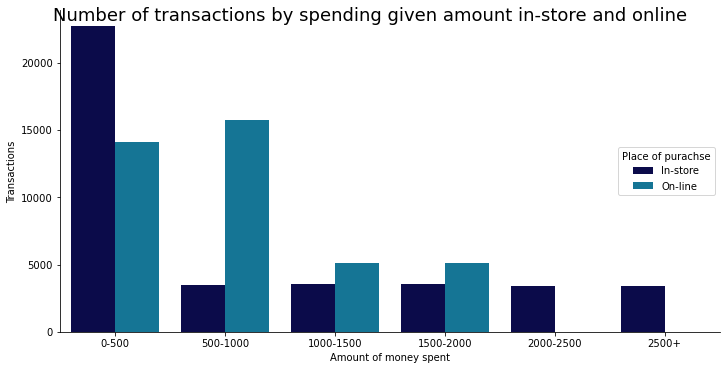

In [36]:
fg = sns.catplot(x='AmountGroup', 
                 hue='in-store', 
                 data=new_data, 
                 kind='count', 
                 aspect=2, 
                 palette='ocean', 
                 legend=False)
fg.set_xticklabels(["0-500", "500-1000", "1000-1500","1500-2000","2000-2500","2500+"])
fg.set_xlabels('Amount of money spent')
fg.set_ylabels('Transactions')
plt.legend(title='Place of purachse',
           labels=['In-store','On-line'],
           loc='center right')
fg.fig.suptitle('Number of transactions by spending given amount in-store and online', 
                fontsize=18, 
                fontdict={"weight": "bold"});

#### Total amount from transaction in each region including online purchases and in store

In [37]:
table_1 = new_data.pivot_table('amount', 'region', 'in-store', 
                               aggfunc=np.sum, 
                               margins=True)
table_1.index=[["North", "South", "East","West","Total"]]
table_1.columns=[['In-store','Online','Total']]
table_1_without_total = table_1.iloc[:4,:2]
table_1_without_total.round(2)

,In-store,Online
North,NaN,11917620.05
South,5040442.24,NaN
East,10793540.39,5729913.08
West,20058007.38,13308982.64


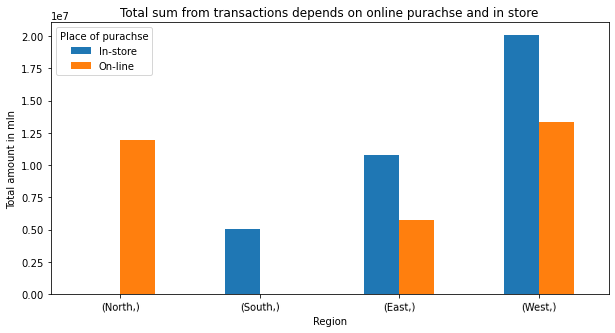

In [38]:
table_1_without_total.plot(kind='bar', 
                           rot=True,
                           figsize=(10,5),
                           xlabel='Region',
                           ylabel='Total amount in mln',
                           title='Total sum from transactions depends on online purachse and in store',
                           legend=False);
plt.legend(title='Place of purachse',
           labels=['In-store','On-line']);

## Conclusion about amount 
Region which spent the most amount of money in 1 transactions is West region. It applies to both: purchase made online and in-store. 

Customers of North region made their purchase only by online transaction, in turn South region only made in-store purchase. 

Transactions concluded in the store are mostly made up to the amount of 500 and after 2000. Online purchases are mainly made up to the amount of 2 000.

Customers between 28 and 62 years old spent money in the amount between 800 - 1000 in average.
Customers over 63 years old spend to 400 in one transactions, and customers to 27 years old spent the most because average amount is over 1000.

## Analysis 'Age'

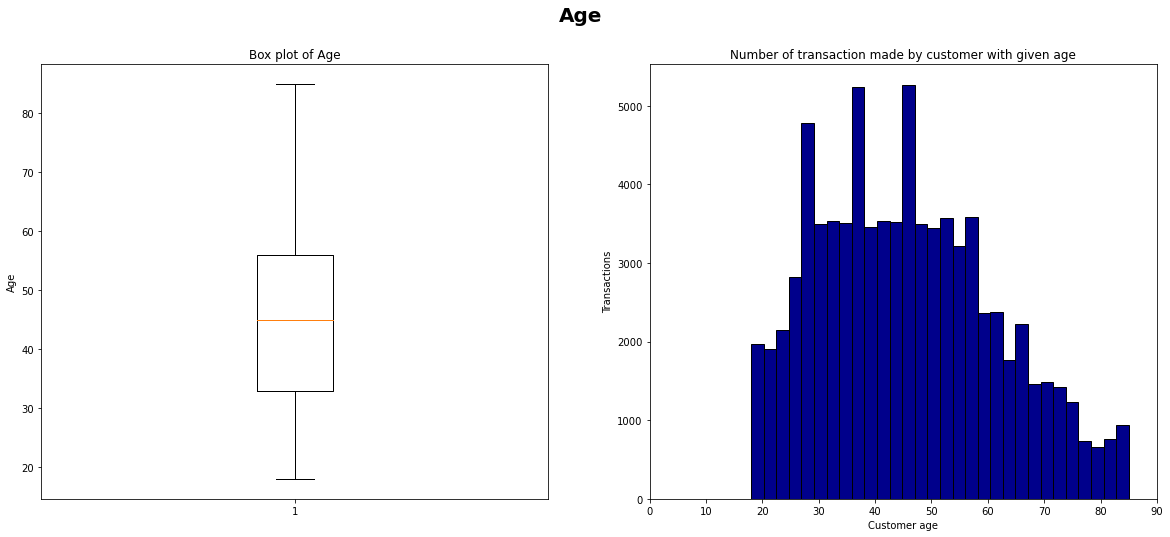

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                     ncols=2,
                     figsize=(20,8))

ax1.boxplot(new_data['age'],0,'gD');
ax1.set(title='Box plot of Age',
              ylabel ='Age')
ax2.hist(new_data['age'], bins=30, edgecolor='black', facecolor='darkblue')
ax2.set_xlim(0,90)
ax2.set(title='Number of transaction made by customer with given age',
        xlabel="Customer age",
        ylabel='Transactions');
fig.suptitle('Age', fontsize=20, fontweight='bold');

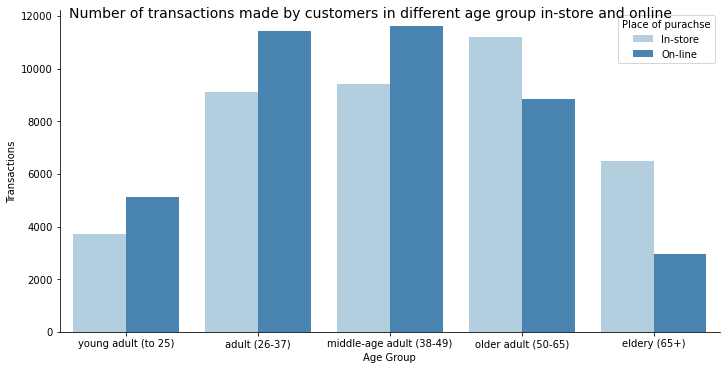

In [40]:
fg_1 = sns.catplot(x='AgeGroup', hue='in-store', data=new_data, kind='count', aspect=2, palette='Blues', legend=False)
fg_1.set_xticklabels(['young adult (to 25)','adult (26-37)','middle-age adult (38-49)','older adult (50-65)','eldery (65+)'])
fg_1.set_xlabels('Age Group')
fg_1.set_ylabels('Transactions')
plt.legend(title='Place of purachse',
           labels=['In-store','On-line'])
fg_1.fig.suptitle('Number of transactions made by customers in different age group in-store and online', fontsize=14, fontdict={"weight": "bold"});

In [41]:
table_2 = new_data.pivot_table('amount', 'AgeGroup', 'in-store', aggfunc=np.sum, margins=True)
table_2.index=[['young adult (to 25)','adult (26-37)','middle-age adult (38-49)','older adult (50-65)','eldery (65+)','Total']]
table_2.columns=[['In-store','Online','Total']]
table_2.iloc[:5,:2].round(2)

,In-store,Online
young adult (to 25),5761647.11,4769663.68
adult (26-37),9345511.53,9422350.54
middle-age adult (38-49),9159417.67,9371745.25
older adult (50-65),9978845.49,5867183.45
eldery (65+),1646568.21,1525572.85


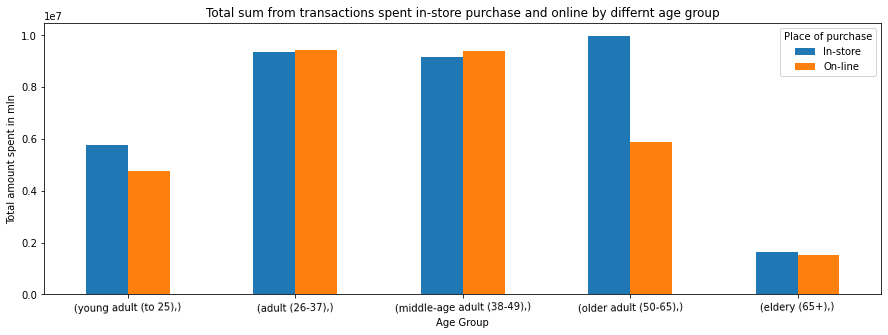

In [42]:
table_2.iloc[:5,:2].plot(kind='bar', 
             rot=True,
             figsize=(15,5),
             xlabel='Age Group',
             ylabel='Total amount spent in mln',
             title='Total sum from transactions spent in-store purchase and online by differnt age group',
             legend=False);
plt.legend(title='Place of purchase',
           labels=['In-store','On-line']);

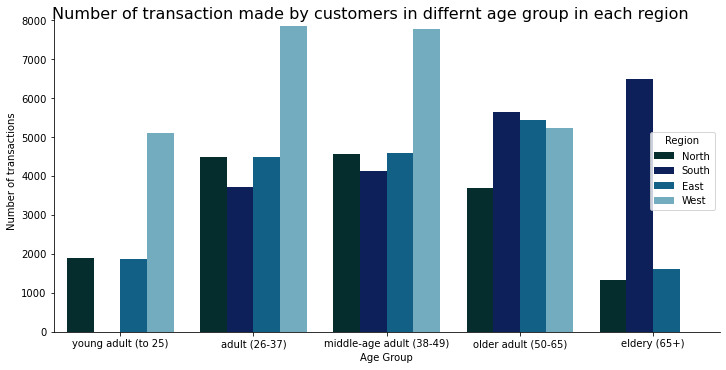

In [43]:
fg_2 = sns.catplot(x='AgeGroup', 
                   hue='region', 
                   data=new_data, 
                   kind='count', 
                   aspect=2, 
                   palette='ocean', 
                   legend=False)
fg_2.set_xticklabels(['young adult (to 25)','adult (26-37)','middle-age adult (38-49)','older adult (50-65)','eldery (65+)'])
fg_2.set_xlabels('Age Group')
fg_2.set_ylabels('Number of transactions')
plt.legend(title='Region',
           labels=["North", "South", "East","West"],
           loc='right')
fg_2.fig.suptitle('Number of transaction made by customers in differnt age group in each region', 
                  fontsize=16, 
                  fontdict={"weight": "bold"});

In [44]:
table_3 = new_data.pivot_table('amount', 'AgeGroup', 'region', 
                               aggfunc=np.sum, 
                               margins=True)
table_3.index=[['young adult (to 25)','adult (26-37)','middle-age adult (38-49)','older adult (50-65)','eldery (65+)','Total']]
table_3.columns=[["North", "South", "East","West",'Total']]
table_3.iloc[:5,:4].round(2)

,North,South,East,West
young adult (to 25),1715020.56,NaN,2338621.32,6477668.91
adult (26-37),3617699.88,929178.96,4279005.60,9941977.63
middle-age adult (38-49),3533499.56,1037606.47,4227548.94,9732507.96
older adult (50-65),2355078.49,1427088.60,4849026.33,7214835.52
eldery (65+),696321.56,1646568.21,829251.30,NaN


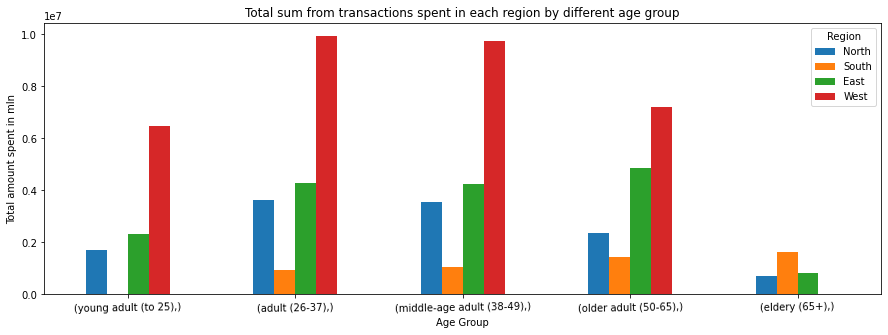

In [45]:
table_3.iloc[:5,:4].plot(kind='bar', 
             rot=True,
             figsize=(15,5),
             xlabel='Age Group',
             ylabel='Total amount spent in mln',
             title='Total sum from transactions spent in each region by different age group',
             legend=False);
plt.legend(title='Region',
           labels=["North", "South", "East","West"]);

## Conclusion about age:
Most of the customers up to 50 years old prefer to buying things in online store, but after 50 they prefer stationery shop.

Young adults (to 25 years old) don't make purchase in South region, in turn in West region there is no customers over 65 years old.

## Analysis 'Region'

In [46]:
# how much costumer spent in each region
data_region_amount = new_data.iloc[:,3:5]

In [47]:
data_region_amount.groupby('region').sum().round(2)

,amount
region,
1,11917620.05
2,5040442.24
3,16523453.47
4,33366990.02


In [48]:
North = new_data.loc[new_data['region'] == 1]['amount']
South = new_data.loc[new_data['region'] == 2]['amount']
East = new_data.loc[new_data['region'] == 3]['amount']
West = new_data.loc[new_data['region'] == 4]['amount']
labels = ['North', 'South', 'East', 'West']

amount                                                        \
          count         mean         std      min       25%       50%   
region                                                                  
1       15997.0   744.990939  492.989025  50.0500  358.9900   662.860   
2       19994.0   252.097741  142.676946   5.0047  129.6300   250.205   
3       18000.0   917.969637  751.409992  50.1320  372.9975   697.825   
4       25988.0  1283.938357  756.302513  50.6000  659.4575  1230.250   

                           
             75%      max  
region                     
1        973.490  1999.80  
2        374.920   499.94  
3       1134.550  3000.00  
4       1812.775  3000.00

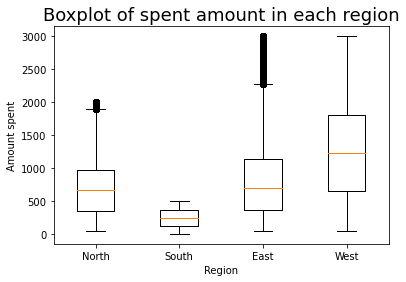

In [49]:
plt.boxplot([North, South, East, West], 
             labels=labels);
plt.title('Boxplot of spent amount in each region', fontsize=18)
plt.xlabel('Region')
plt.ylabel('Amount spent');

data_region_amount.groupby('region').describe()

In [50]:
North = new_data.loc[new_data['region'] == 1]['age']
South = new_data.loc[new_data['region'] == 2]['age']
East = new_data.loc[new_data['region'] == 3]['age']
West = new_data.loc[new_data['region'] == 4]['age']
labels = ['North', 'South', 'East', 'West']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,43.704132,14.085525,19.0,32.0,43.0,53.0,74.0
2,19994.0,56.609083,16.537368,28.0,42.0,57.0,71.0,85.0
3,18000.0,45.646944,14.417935,18.0,34.0,45.0,57.0,74.0
4,25988.0,38.752424,11.886239,18.0,29.0,39.0,49.0,63.0


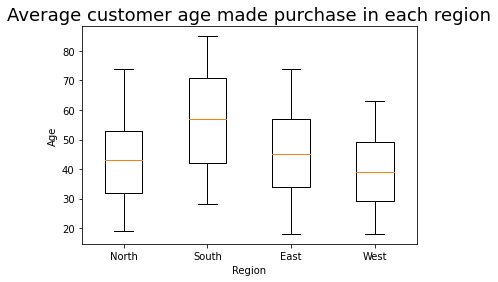

In [51]:
plt.boxplot([North, South, East, West], 
             labels=labels);
plt.title('Average customer age made purchase in each region', fontsize=18)
plt.xlabel('Region')
plt.ylabel('Age');

new_data.groupby('region')['age'].describe()

In [52]:
# Number of purchase in each region
new_data.groupby('region')['region'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

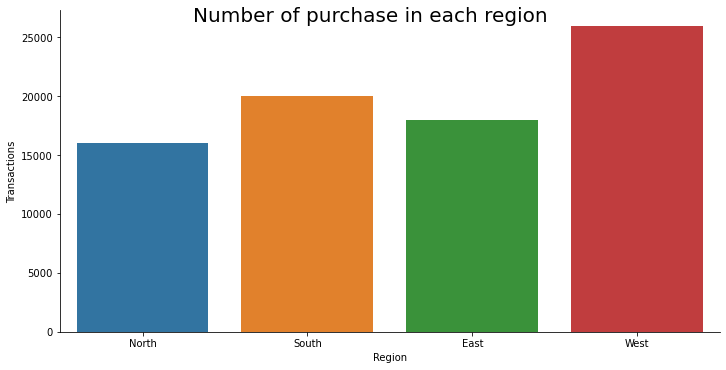

In [53]:
fg = sns.catplot(x='region', data=new_data, kind='count', aspect=2)
fg.set_xticklabels(["North", "South", "East","West"])
fg.set(xlabel='Region',
       ylabel='Transactions')
fg.fig.suptitle('Number of purchase in each region', fontsize=20, fontdict={"weight": "bold"});

In [54]:
table_4 = pd.crosstab(index=new_data['region'] , 
                      columns=new_data['in-store'])
table_4.index=[['North', "South", "East","West"]]
table_4.columns=[['in-store','online']]
table_4

,in-store,online
North,0,15997
South,19994,0
East,7001,10999
West,12994,12994


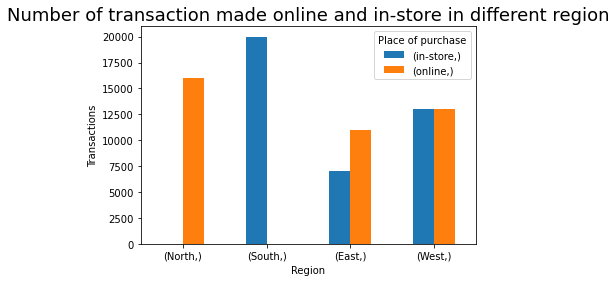

In [55]:
table_4.plot(kind='bar')
plt.title('Number of transaction made online and in-store in different region',
          fontsize=18)
plt.legend(title='Place of purchase')
plt.xlabel('Region')
plt.xticks(rotation=360)
plt.ylabel('Transactions');

## Conclusion about region:
West region made the most number of purchase including in-store purchases and online, but comparing only online shopping North region made the most transactions and comparing only in-store shopping South region made the most. 

Interestingly South region made a lot of in-store purchases but the income from this transactions is the lowest from the other region. 

Customers from the West region spend the most on one transaction with average 1283, and South region spend the least  with average 252 per transaction.

## Analysis 'Items'

In [56]:
table_1 = pd.crosstab(index=new_data['region'] , 
                      columns=new_data['items'])
table_1.index=[["North", "South", "East","West"]]
table_1

items,1,2,3,4,5,6,7,8
North,1106,2221,2316,2390,2240,2358,2181,1185
South,1442,2828,2801,2891,2802,2890,2906,1434
East,1260,2576,2599,2675,2513,2515,2568,1294
West,1891,3659,3770,3638,3678,3756,3721,1875


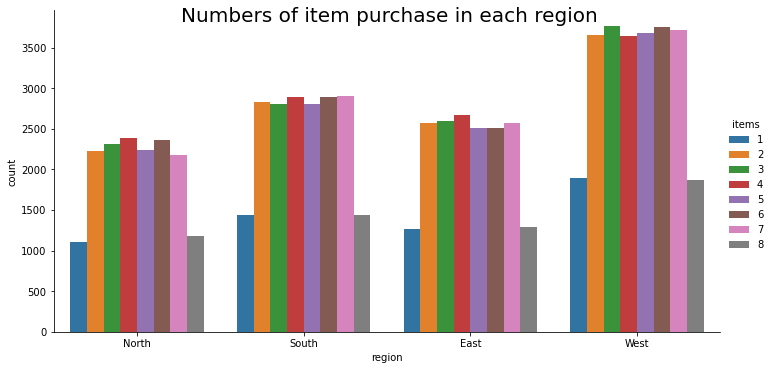

In [57]:
fg_1 = sns.catplot(x='region', 
                   hue='items', 
                   data=new_data, 
                   kind='count', 
                   aspect=2)
fg_1.set_xticklabels(["North", "South", "East","West"])
fg_1.set_xlabels('region')
fg_1.fig.suptitle('Numbers of item purchase in each region', 
                  fontsize=20, 
                  fontdict={"weight": "bold"});

In [58]:
table_3 = pd.crosstab(index=new_data['in-store'] , 
                      columns=new_data['items'])
table_3.index=[['in-store','online']]
table_3

items,1,2,3,4,5,6,7,8
in-store,2840,5679,5687,5774,5565,5721,5813,2910
online,2859,5605,5799,5820,5668,5798,5563,2878


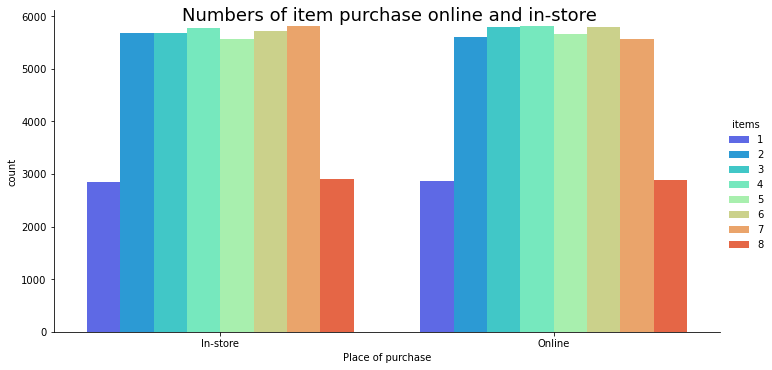

In [59]:
fg_1 = sns.catplot(x='in-store', 
                   hue='items', 
                   data=new_data, 
                   kind='count', 
                   aspect=2, 
                   palette='rainbow')
fg_1.set_xlabels('Place of purchase')
fg_1.set_xticklabels(["In-store", "Online"])
fg_1.fig.suptitle('Numbers of item purchase online and in-store', 
                  fontsize=18, 
                  fontdict={"weight": "bold"});

In [60]:
one = new_data.loc[new_data['items'] == 1]['amount']
two = new_data.loc[new_data['items'] == 2]['amount']
three = new_data.loc[new_data['items'] == 3]['amount']
four = new_data.loc[new_data['items'] == 4]['amount']
five = new_data.loc[new_data['items'] == 5]['amount']
six = new_data.loc[new_data['items'] == 6]['amount']
seven = new_data.loc[new_data['items'] == 7]['amount']
eight = new_data.loc[new_data['items'] == 8]['amount']

labels = ['1', '2', '3','4', '5', '6', '7', '8']

,count,mean,std,min,25%,50%,75%,max
items,,,,,,,,
1,5699.0,825.401751,714.696664,5.3043,284.2200,571.980,1199.350,2998.6
2,11284.0,846.956834,730.064463,5.0604,283.7625,589.180,1263.050,2999.6
3,11486.0,836.594085,715.705233,5.0660,288.5600,590.655,1241.675,2999.7
4,11594.0,829.619594,722.440415,5.3136,284.7325,575.840,1206.250,2999.0
5,11233.0,833.973730,714.694293,5.6316,284.4700,584.380,1222.900,2999.8
6,11519.0,835.332638,723.661465,5.0047,281.0500,574.780,1251.000,2999.6
7,11376.0,830.026801,719.788395,5.3799,284.3700,576.645,1211.150,3000.0
8,5788.0,851.268593,729.749044,5.2610,290.7100,589.070,1269.100,3000.0


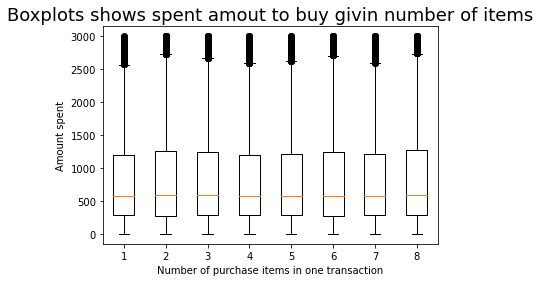

In [61]:
plt.boxplot([one,two,three,four,five,six,seven,eight], 
             labels=labels);
plt.title('Boxplots shows spent amout to buy givin number of items', fontsize=18)
plt.xlabel('Number of purchase items in one transaction')
plt.ylabel('Amount spent');

new_data.groupby('items')['amount'].describe()

In [62]:
one = new_data.loc[new_data['items'] == 1]['age']
two = new_data.loc[new_data['items'] == 2]['age']
three = new_data.loc[new_data['items'] == 3]['age']
four = new_data.loc[new_data['items'] == 4]['age']
five = new_data.loc[new_data['items'] == 5]['age']
six = new_data.loc[new_data['items'] == 6]['age']
seven = new_data.loc[new_data['items'] == 7]['age']
eight = new_data.loc[new_data['items'] == 8]['age']

labels = ['1', '2', '3','4', '5', '6', '7', '8']

,count,mean,std,min,25%,50%,75%,max
items,,,,,,,,
1,5699.0,45.968416,15.670116,18.0,34.0,44.0,57.0,85.0
2,11284.0,45.724832,15.711591,18.0,33.0,45.0,56.0,85.0
3,11486.0,45.578530,15.517088,18.0,33.0,44.0,56.0,85.0
4,11594.0,45.711747,15.809262,18.0,33.0,44.0,56.0,85.0
5,11233.0,45.768717,15.742455,18.0,33.0,44.0,56.0,85.0
6,11519.0,45.917267,15.688074,18.0,33.0,45.0,56.0,85.0
7,11376.0,45.820851,15.816144,18.0,33.0,45.0,57.0,85.0
8,5788.0,45.610055,15.772844,18.0,33.0,44.0,56.0,85.0


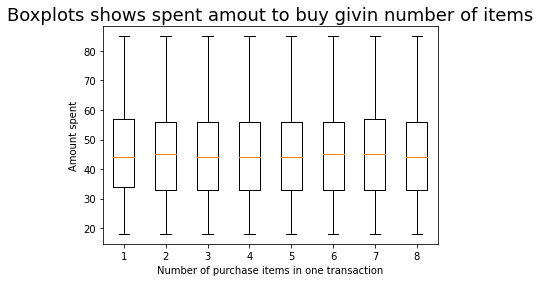

In [63]:
plt.boxplot([one,two,three,four,five,six,seven,eight], 
             labels=labels);
plt.title('Boxplots shows spent amout to buy givin number of items', fontsize=18)
plt.xlabel('Number of purchase items in one transaction')
plt.ylabel('Amount spent');

new_data.groupby('items')['age'].describe()

#### Amount spent in each region divided by number of items purchase

In [64]:
table_6 = new_data.pivot_table('amount', 'region', 'items', aggfunc=np.sum, margins=True)
table_6.index=[["North", "South", "East","West","Total"]]
table_6.round(2)

items,1,2,3,4,5,6,7,8,All
North,831104.06,1703340.14,1722665.97,1738248.28,1670452.91,1744998.34,1609124.30,897686.05,11917620.05
South,371441.53,707034.29,706361.83,721670.97,707222.47,736837.34,731542.03,358331.78,5040442.24
East,1126741.98,2400234.37,2381780.40,2501151.64,2290796.80,2271135.08,2337951.39,1213661.82,16523453.47
West,2374677.01,4746452.12,4798311.46,4657538.68,4699554.73,4869225.89,4763767.16,2457462.96,33366990.02
Total,4703964.58,9557060.91,9609119.67,9618609.57,9368026.91,9622196.66,9442384.88,4927142.61,66848505.79


#### Average amount spent in each region divided by number of items purchase

In [65]:
table_6 = new_data.pivot_table('amount', 'region', 'items', margins=True)
table_6.index=[["North", "South", "East","West","Total"]]
table_6.round(2)

items,1,2,3,4,5,6,7,8,All
North,751.45,766.92,743.81,727.30,745.74,740.03,737.79,757.54,744.99
South,257.59,250.01,252.18,249.63,252.40,254.96,251.74,249.88,252.10
East,894.24,931.77,916.42,935.01,911.58,903.04,910.42,937.91,917.97
West,1255.78,1297.20,1272.76,1280.25,1277.75,1296.39,1280.24,1310.65,1283.94
Total,825.40,846.96,836.59,829.62,833.97,835.33,830.03,851.27,835.83


## Conclusion about items:
The amount of purchased items does not affect increasing amount spent on one transactions, what means that customers buying more things choose the cheaper products.

Customers choose to buy together from 2 to 7 products in average. Less frequently they purchase only 1 product or 8. The same pattern is both: online and in-store transactions and also in each region. 

### Correlation

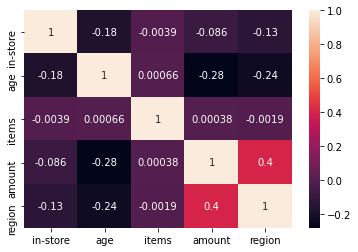

In [66]:
correlation = new_data.corr()

#print(correlation)
sns.heatmap(correlation, annot=True);
#sns.set(rc={'figure.figsize':(5,5)})

'Region' and 'Amount' have positive relationship but weak strength of relationship. But compare to the other future in the dataset they have the strongest relationship with each other.

Another relationship can be made with:
<ol>
<li>'Age' and 'Amount'</li>
<li>'Age' and 'Region'</li>
</ol>
Both have negative correlations and very weak strength of relationship on first sight.

### Covariance

In [67]:
cov_mat = new_data.cov()
df = pd.DataFrame(cov_mat, new_data.columns)
df.round(3)
#df.iloc[:-2,:]

,in-store,age,items,amount,region
in-store,0.250,-1.400,-0.004,-30.860,-0.075
age,-1.400,246.966,0.021,-3196.783,-4.167
items,-0.004,0.021,4.249,0.571,-0.004
amount,-30.860,-3196.783,0.571,520221.252,327.875
region,-0.075,-4.167,-0.004,327.875,1.269
AmountGroup,NaN,NaN,NaN,NaN,NaN
AgeGroup,NaN,NaN,NaN,NaN,NaN


From the table above it is worth taking a look at the relationship that occurs between: 
<ol>
<li>'Amount - In-store'</li>
<li>'Amount - Age'</li>
<li>'Amount - Region'</li>
<li>'Region - Age'</li>
</ol>

### Different data visualization

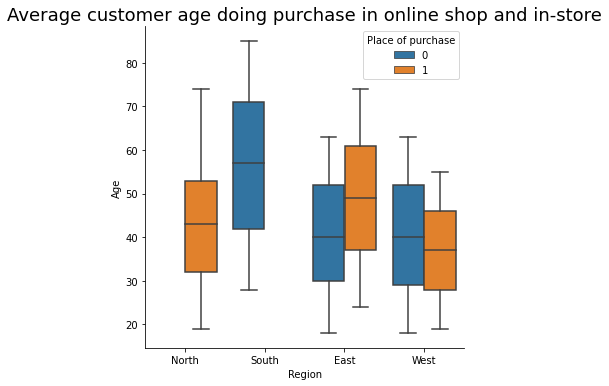

In [68]:
chart_1 = sns.catplot(x='region',
            y='age', 
            hue='in-store', 
            data=new_data, 
            kind='box',
            legend=False)
chart_1.set_axis_labels("Region", "Age")
chart_1.set_xticklabels(["North", "South", "East","West"]);
plt.legend(title='Place of purchase',);
plt.title('Average customer age doing purchase in online shop and in-store',
          fontsize=18);

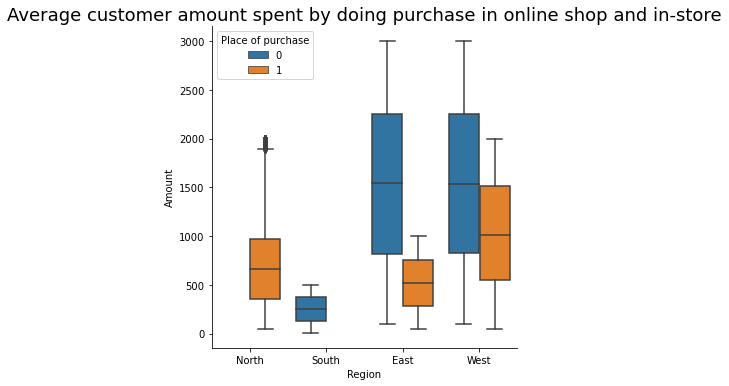

In [69]:
chart_2 = sns.catplot(x='region',
            y='amount', 
            hue='in-store', 
            data=new_data, 
            kind='box',
            legend=False)
chart_2.set_axis_labels("Region", "Amount")
chart_2.set_xticklabels(["North", "South", "East","West"]);
#labels=["In-store", "Online"]
plt.legend(title='Place of purchase',);
plt.title('Average customer amount spent by doing purchase in online shop and in-store',
          fontsize=18);

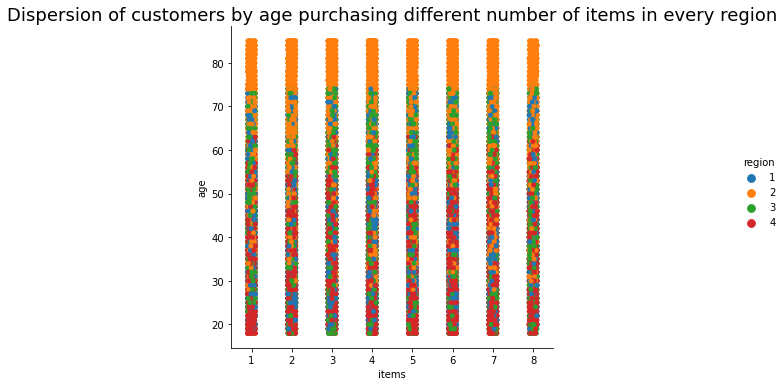

In [70]:
sns.catplot(data=new_data, 
            x="items", 
            y='age', 
            hue='region')
plt.title('Dispersion of customers by age purchasing different number of items in every region',
          fontsize=18);

# 2) Secend part 

In [71]:
new_data.head()

,in-store,age,items,amount,region,AmountGroup,AgeGroup
0,0,37,4,281.03,2,0-500,adult
1,0,35,2,219.51,2,0-500,adult
2,1,45,3,1525.70,4,1500-2000,middle-age adult
3,1,46,3,715.25,3,500-1000,middle-age adult
4,1,33,4,1937.50,1,1500-2000,adult


In [72]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   in-store     79979 non-null  int64   
 1   age          79979 non-null  int64   
 2   items        79979 non-null  int64   
 3   amount       79979 non-null  float64 
 4   region       79979 non-null  int64   
 5   AmountGroup  79979 non-null  category
 6   AgeGroup     79979 non-null  category
dtypes: category(2), float64(1), int64(4)
memory usage: 6.3 MB


In [73]:
new_data = new_data.iloc[:,:5]
new_data.shape

(79979, 5)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

### Select the features and the Dependent Variable 
1. Dependent Variable: `in-store`
2. Dependent Variable: `region`
3. Dependent Variable: `age`
4. Dependent Variable: `amount`

### Testing different models

* Decision Tree
* Random Forest Classifier 
* Gradient Boosting Classifier

### 1. Dependent variable: `in-store`

In [112]:
# Choose dependent variable
X = new_data.drop(['in-store'], axis=1)
y = new_data['in-store']

In [113]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
#Create a dictionary with models
models = {"Decision Tree Classifier": DecisionTreeClassifier(max_depth=6,
                                                             min_samples_split=4,
                                                             min_samples_leaf=3),
          "Random Forest Classifier": RandomForestClassifier(max_depth=7,
                                                             n_estimators=90,
                                                             min_samples_split=4,
                                                             min_samples_leaf=3),
          "Gradient Boosting Classifier": GradientBoostingClassifier(max_depth=7)}

#Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores_in_store = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores_in_store[name] = model.score(X_test, y_test)
    return model_scores_in_store

In [139]:
model_scores_in_store = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)
model_scores_in_store

{'Decision Tree Classifier': 0.886138201216971,
 'Random Forest Classifier': 0.8841793781778778,
 'Gradient Boosting Classifier': 0.886138201216971}

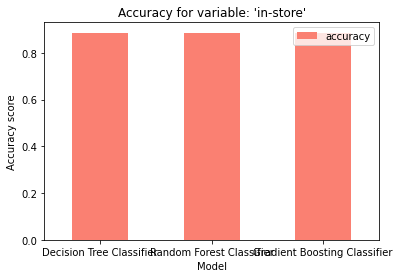

In [140]:
#Seeon graph which model has the highest accuracy
model_compare = pd.DataFrame(model_scores_in_store, index=['accuracy'])
model_compare.T.plot.bar(color='salmon')
plt.xticks(rotation=0);
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.title("Accuracy for variable: 'in-store'");

In [141]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boost Classifier', GradientBoostingClassifier()))

In [142]:
#classification
results = []
names = []

In [143]:
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [144]:
print('Accuracy score from cross validation:')
for i in range(len(names)):
    print(names[i],results[i].mean())

Accuracy score from cross validation:
Random Forest Classifier 0.8586129005337346
Decision Tree Classifier 0.8453969141409475
Gradient Boost Classifier 0.8873454123499366


Dependent variable 'in-store' doing pretty well with cross validation accuracy score without tunning models. 

### 2. Dependent variable: `region`

In [146]:
# Choose dependent variable
X = new_data.drop(['region','items'], axis=1)
y = new_data['region']

In [147]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [159]:
#Create a dictionary with models
models = {"Decision Tree Classifier": DecisionTreeClassifier(max_depth=8,
                                                             min_samples_split=4,
                                                             min_samples_leaf=3),
          "Random Forest Classifier": RandomForestClassifier(max_depth=9,
                                                             n_estimators=90,
                                                             min_samples_split=4,
                                                             min_samples_leaf=3),
          "Gradient Boosting Classifier": GradientBoostingClassifier()}

#Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores_region = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores_region[name] = model.score(X_test, y_test)
    return model_scores_region

In [160]:
model_scores_region = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)
model_scores_region

{'Decision Tree Classifier': 0.6445778111194466,
 'Random Forest Classifier': 0.6462448945569725,
 'Gradient Boosting Classifier': 0.6467866966741685}

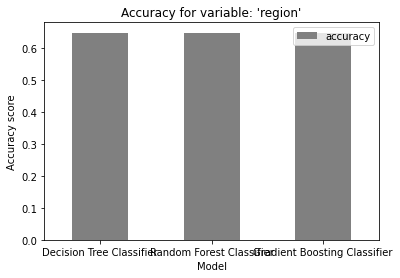

In [161]:
#Seeon graph which model has the highest accuracy
model_compare = pd.DataFrame(model_scores_region, index=['accuracy'])
model_compare.T.plot.bar(color='grey')
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.title("Accuracy for variable: 'region'");

In [162]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boost Classifier', GradientBoostingClassifier()))

In [163]:
#classification
results = []
names = []

In [164]:
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [165]:
print('Accuracy score from cross validation:')
for i in range(len(names)):
    print(names[i],results[i].mean())

Accuracy score from cross validation:
Random Forest Classifier 0.5653483956907679
Decision Tree Classifier 0.5633978719557041
Gradient Boost Classifier 0.6437314958170504


Dependent variable 'region' has the highest accuracy score with Gradient Boost Classifier so far.

### Binning `age` and `amount`

In [166]:
new_data['bin-Age'] = pd.cut(new_data['age'], 
                         bins=[17,26,38,50,66,85],
                         labels = ['young adult','adult','middle-age adult','older adult','eldery'])
new_data['bin-Amount'] = pd.cut(new_data['amount'], 
                         bins=[0,500,1000,2000,3000],
                         labels = ['to 500','500-1000','1000-2000','2000+'])
new_data.head()

,in-store,age,items,amount,region,bin-Age,bin-Amount
0,0,37,4,281.03,2,adult,to 500
1,0,35,2,219.51,2,adult,to 500
2,1,45,3,1525.70,4,middle-age adult,1000-2000
3,1,46,3,715.25,3,middle-age adult,500-1000
4,1,33,4,1937.50,1,adult,1000-2000


In [167]:
new_data['bin-Amount'] = new_data['bin-Amount'].map({'to 500':0, '500-1000':1,'1000-2000':2, '2000+':3})
new_data['bin-Age'] = new_data['bin-Age'].map({'young adult':0, 'adult':1, 'middle-age adult':2, 'older adult':3, 'eldery':4})
new_data.head()

,in-store,age,items,amount,region,bin-Age,bin-Amount
0,0,37,4,281.03,2,1,0
1,0,35,2,219.51,2,1,0
2,1,45,3,1525.70,4,2,2
3,1,46,3,715.25,3,2,1
4,1,33,4,1937.50,1,1,2


In [168]:
data_drop = new_data.drop(['age', 'amount'], axis=1)
data_drop

,in-store,items,region,bin-Age,bin-Amount
0,0,4,2,1,0
1,0,2,2,1,0
2,1,3,4,2,2
3,1,3,3,2,1
4,1,4,1,1,2
...,...,...,...,...,...
79995,1,3,1,4,1
79996,0,7,3,3,2
79997,0,1,2,3,0
79998,1,4,1,2,0


In [194]:
data_dummies = pd.get_dummies(data_drop, columns=['bin-Amount',
                                                  'bin-Age'])
data_dummies.head()

,in-store,items,region,bin-Amount_0,bin-Amount_1,bin-Amount_2,bin-Amount_3,bin-Age_0,bin-Age_1,bin-Age_2,bin-Age_3,bin-Age_4
0,0,4,2,1,0,0,0,0,1,0,0,0
1,0,2,2,1,0,0,0,0,1,0,0,0
2,1,3,4,0,0,1,0,0,0,1,0,0
3,1,3,3,0,1,0,0,0,0,1,0,0
4,1,4,1,0,0,1,0,0,1,0,0,0


### Tunning Decision Tree with dependent variable: `region` ---> 78% accuracy

Classification Report: 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     10083
           1       0.79      0.86      0.82     13911

    accuracy                           0.78     23994
   macro avg       0.78      0.77      0.77     23994
weighted avg       0.78      0.78      0.78     23994

Accuracy score on training data is: 0.79
Accuracy score on test data is: 0.78
Precision score on test data is: 0.79
Recall score on test data is: 0.86
F1 score on test data is: 0.82

Cross validation score: 0.79

Confussion matrix:


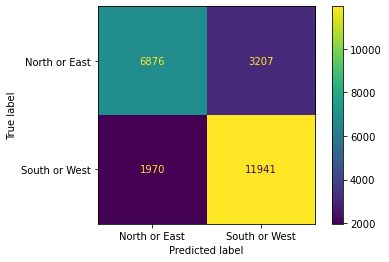

In [219]:
#Split into X & y
X = data_dummies.drop(['region', 'items'], axis=1)
y = data_dummies['region'].map({1:0, 2:1, 3:0, 4:1})

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate DecisionTreeClassifier and fit training data
dt_region = DecisionTreeClassifier(max_depth=8,
                                   min_samples_split=4,
                                   min_samples_leaf=9).fit(X_train, y_train)

# Making prediction on test data
y_preds = dt_region.predict(X_test)

# Show result:
print(f"Classification Report: \n\n{classification_report(y_test, y_preds)}")
print(f"Accuracy score on training data is: {dt_region.score(X_train, y_train):.2f}")
print(f"Accuracy score on test data is: {dt_region.score(X_test, y_test):.2f}")
print(f"Precision score on test data is: {precision_score(y_test, y_preds):.2f}")
print(f"Recall score on test data is: {recall_score(y_test, y_preds):.2f}")
print(f"F1 score on test data is: {f1_score(y_test, y_preds):.2f}")
print(f"\nCross validation score: {np.mean(cross_val_score(dt_region, X, y, cv=4)):.2f}")
print('\nConfussion matrix:')
plot_confusion_matrix(dt_region, X_test, y_test, display_labels=['North or East', 'South or West']);

### Random Forest (`region`) ---> 64% accuracy

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      4749
           2       0.91      1.00      0.95      6049
           3       0.56      0.21      0.31      5334
           4       0.65      0.73      0.69      7862

    accuracy                           0.65     23994
   macro avg       0.63      0.62      0.60     23994
weighted avg       0.65      0.65      0.63     23994

Accuracy score on trainind data is: 0.65
Accuracy score on testing data is: 0.65

Cross validation score: 0.64

Confussion matrix:


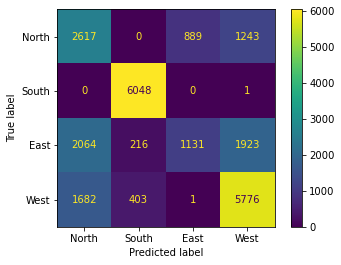

In [234]:
#Split into X & y
np.random.seed(42)
X = new_data.drop(['region','items','bin-Age','bin-Amount'], axis=1)
y = new_data['region']

# Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Choosing and fitting the model to training data set
rf_region = RandomForestClassifier(n_estimators=120,
                                   min_samples_split=120, 
                                   min_samples_leaf=15, 
                                   max_depth=8).fit(X_train, y_train)
y_preds = rf_region.predict(X_test)

# Showing accurancy score and classification report
print(classification_report(y_test, y_preds))
print(f"Accuracy score on trainind data is: {rf_region.score(X_train, y_train):.2f}")
print(f"Accuracy score on testing data is: {rf_region.score(X_test, y_test):.2f}")
print(f"\nCross validation score: {np.mean(cross_val_score(rf_region, X, y, cv=3)):.2f}")
print('\nConfussion matrix:')
plot_confusion_matrix(rf_region, X_test, y_test, display_labels=['North','South','East','West']);

### Gradient Boosting (`region`) ---> 79% accuracy

              precision    recall  f1-score   support

           0       0.80      0.68      0.74     10229
           1       0.79      0.88      0.83     13765

    accuracy                           0.79     23994
   macro avg       0.79      0.78      0.78     23994
weighted avg       0.79      0.79      0.79     23994

Accuracy score on trainind data is: 0.79
Accuracy score on testing data is: 0.79
Precision score on test data is: 0.79
Recall score on test data is: 0.88
F1 score on test data is: 0.83

Cross validation score: 0.79

Confussion matrix:


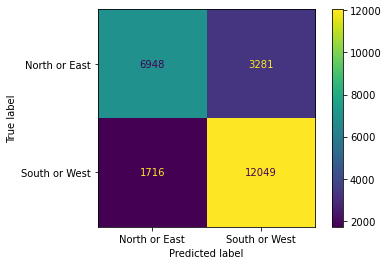

In [340]:
#Split into X & y
X = new_data.drop(['region','bin-Age','bin-Amount','items'], axis=1)
y = new_data['region'].map({1:0, 2:1, 3:0, 4:1})

# Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Choosing and fitting the model to training data set
gbc_region = GradientBoostingClassifier(min_samples_split = 42,
                                        min_samples_leaf = 21,
                                        max_depth = 5,
                                        max_features='sqrt',
                                        n_estimators=50)
gbc_region.fit(X_train, y_train)
y_preds = gbc_region.predict(X_test)

# Showing accurancy score and classification report
print(classification_report(y_test, y_preds))
print(f"Accuracy score on trainind data is: {gbc_region.score(X_train, y_train):.2f}")
print(f"Accuracy score on testing data is: {gbc_region.score(X_test, y_test):.2f}")
print(f"Precision score on test data is: {precision_score(y_test, y_preds):.2f}")
print(f"Recall score on test data is: {recall_score(y_test, y_preds):.2f}")
print(f"F1 score on test data is: {f1_score(y_test, y_preds):.2f}")
print(f"\nCross validation score: {np.mean(cross_val_score(gbc_region, X, y, cv=4)):.2f}")
print('\nConfussion matrix:')
#plot_confusion_matrix(gbc_region, X_test, y_test, display_labels=['North','South','East','West']);
plot_confusion_matrix(gbc_region, X_test, y_test, display_labels=['North or East', 'South or West']);

In [341]:
# Choose hyperparameter for differnet models:
gb_grid = {'n_estimators': np.arange(50,400,50),
          'max_depth': [None, 5, 7],
          'min_samples_split': np.arange(2, 40, 10),
          'min_samples_leaf': np.arange(1,30,5),
          'max_features': [0.5, None, 'auto', 'sqrt']}

In [342]:
np.random.seed(42)
#Tone hyperparameters in Gradient Boosting Classifier:
model_gb_region = RandomizedSearchCV(GradientBoostingClassifier(),
                                     param_distributions=gb_grid,
                                     cv=3,
                                     n_iter=5)
model_gb_region.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 5, 7],
                                        'max_features': [0.5, None, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26]),
                                        'min_samples_split': array([ 2, 12, 22, 32]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])})

In [343]:
model_gb_region.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 21,
 'max_features': 'auto',
 'max_depth': 5}

In [344]:
model_gb_region.score(X_test, y_test)

0.7908227056764191

### 3. Dependent variable: `age`

In [270]:
# Choose dependent variable
X = new_data.drop(['bin-Age','items','amount', 'age'], axis=1)
y = new_data['bin-Age']

In [271]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [272]:
#Create a dictionary with models
models = {"Decision Tree Classifier": DecisionTreeClassifier(max_depth=6,
                                                             min_samples_split=10,
                                                             min_samples_leaf=3),
          "Random Forest Classifier": RandomForestClassifier(max_depth=7,
                                                             n_estimators=90,
                                                             min_samples_split=20,
                                                             min_samples_leaf=5),
          "Gradient Boosting Classifier": GradientBoostingClassifier(max_depth=8)}

#Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores_age = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores_age[name] = model.score(X_test, y_test)
    return model_scores_age

In [273]:
model_scores_age = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)
model_scores_age

{'Decision Tree Classifier': 0.30178377927815286,
 'Random Forest Classifier': 0.30178377927815286,
 'Gradient Boosting Classifier': 0.30178377927815286}

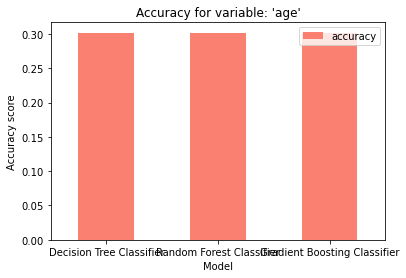

In [274]:
#Seeon graph which model has the highest accuracy
model_compare = pd.DataFrame(model_scores_age, index=['accuracy'])
model_compare.T.plot.bar(color='salmon')
plt.xticks(rotation=0);
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.title("Accuracy for variable: 'age'");

Try to group customers by age in 3 group:
1. young adult (18-37)
2. adult (38-65)
3. eldery (66+)

Classification Report: 

              precision    recall  f1-score   support

           0       0.47      0.66      0.55      8754
           1       0.24      0.01      0.02      6396
           2       0.52      0.68      0.59      8844

    accuracy                           0.49     23994
   macro avg       0.41      0.45      0.39     23994
weighted avg       0.43      0.49      0.42     23994

Accuracy score on trainind data is: 0.52
Accuracy score on test data is: 0.49

Cross validation score: 0.50

Confussion matrix:


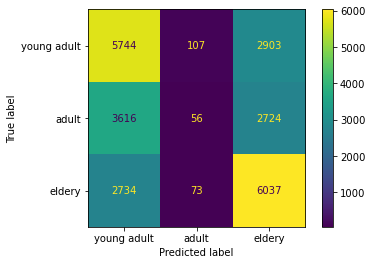

In [282]:
#Split into X & y
X = new_data.drop(['bin-Age','age','bin-Amount','items'], axis=1)
y = new_data['bin-Age'].map({0:0, 1:0, 2:1, 3:2, 4:2})
#({'young adult':0, 'adult':1, 'middle-age adult':2, 'older adult':3, 'eldery':4}

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate DecisionTreeClassifier and fit training data
gb_age = GradientBoostingClassifier(n_estimators=80,
                                    min_samples_split=100,
                                    min_samples_leaf=25,
                                    max_features='sqrt',
                                    max_depth=7).fit(X_train, y_train)

# Making prediction on test data
y_preds = gb_age.predict(X_test)

# Show result:
print(f"Classification Report: \n\n{classification_report(y_test, y_preds)}")
print(f"Accuracy score on trainind data is: {gb_age.score(X_train, y_train):.2f}")
print(f"Accuracy score on test data is: {gb_age.score(X_test, y_test):.2f}")
print(f"\nCross validation score: {np.mean(cross_val_score(gb_age, X, y, cv=3)):.2f}")
print('\nConfussion matrix:')
plot_confusion_matrix(gb_age, X_test, y_test, display_labels=['young adult','adult','eldery']);
#display_labels=['young adult','adult','middle-age adult','older adult','eldery'])

### 4. Dependent variable: `amount` --> 57% accuracy

Prediction with model by group customers in 4 different group depending on 'spend amount':
1. to 500
2. 500-1000
3. 1000-2000
4. 2000+

In [283]:
# Choose dependent variable
X = new_data.drop(['bin-Amount','items','amount', 'bin-Age'], axis=1)
y = new_data['bin-Amount']

In [284]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [295]:
#Create a dictionary with models
models = {"Decision Tree Classifier": DecisionTreeClassifier(max_depth=6),
          "Random Forest Classifier": RandomForestClassifier(max_depth=6),
          "Gradient Boosting Classifier": GradientBoostingClassifier()}

#Create a function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores_amount = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores_amount[name] = model.score(X_test, y_test)
    return model_scores_amount

In [296]:
model_scores_amount = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)
model_scores_amount

{'Decision Tree Classifier': 0.5740601817120947,
 'Random Forest Classifier': 0.5748520463449196,
 'Gradient Boosting Classifier': 0.5722680670167541}

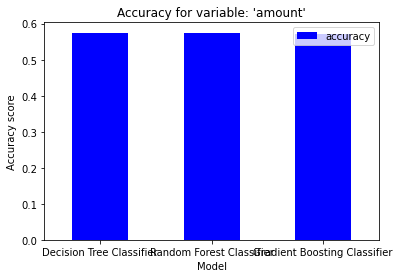

In [297]:
#Seeon graph which model has the highest accuracy
model_compare = pd.DataFrame(model_scores_amount, index=['accuracy'])
model_compare.T.plot.bar(color='blue')
plt.xticks(rotation=0);
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.title("Accuracy for variable: 'amount'");

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.64      0.72     11014
           1       0.47      0.42      0.45      5819
           2       0.44      0.64      0.52      5152
           3       0.34      0.45      0.39      2009

    accuracy                           0.57     23994
   macro avg       0.52      0.54      0.52     23994
weighted avg       0.62      0.57      0.58     23994

Accuracy score on trainind data is: 0.58
Accuracy score on test data is: 0.57

Cross validation score: 0.57

Confussion matrix:


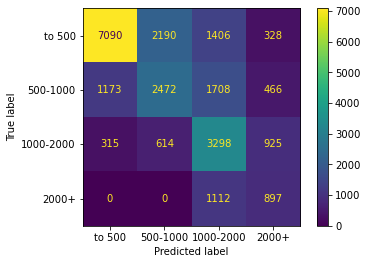

In [335]:
#Split into X & y
X = new_data.drop(['bin-Amount','items','amount', 'bin-Age'], axis=1)
y = new_data['bin-Amount']

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate DecisionTreeClassifier and fit training data
dt_amount = DecisionTreeClassifier(max_depth=10,
                                   min_samples_split=15,
                                   min_samples_leaf=3,
                                   max_features='log2').fit(X_train, y_train)

# Making prediction on test data
y_preds = dt_amount.predict(X_test)

# Show result:
print(f"Classification Report: \n\n{classification_report(y_test, y_preds)}")
print(f"Accuracy score on trainind data is: {dt_amount.score(X_train, y_train):.2f}")
print(f"Accuracy score on test data is: {dt_amount.score(X_test, y_test):.2f}")
print(f"\nCross validation score: {np.mean(cross_val_score(dt_amount, X, y, cv=4)):.2f}")
print('\nConfussion matrix:')
plot_confusion_matrix(dt_amount, X_test, y_test, display_labels=['to 500','500-1000','1000-2000','2000+']);
#display_labels=['young adult','adult','middle-age adult','older adult','eldery'])

## Conclusions Phase 1:

#### Do customers in different regions spend more per transaction? Which regions spend the most/least?
Yes. Customers from the West region spend the most on one transaction with average 1283, it applies to both: purchase made online and in-store and South region spend the least  with average 252 per transaction.

Customers of North region made their purchase only by online transaction, in turn South region only made in-store purchase.

Interestingly South region made a lot of in-store purchases but the income from this transactions is the lowest from the others region. This may be due to the fact that in this region the largest amount for which the transaction was made is 500. Moreover, these purchases are mainly made by older customers, who may not need to buy a lot of expensive electronic products.  

####  Is there a relationship between number of items purchased and amount spent?
No. The amount of purchased items does not affect increasing amount spent on one transactions, what means that customers buying more things choose the cheaper products.

Customers choose to buy together from 2 to 7 products in average. Less frequently they purchase only 1 product or 8. The same pattern is both: online and in-store transactions and also in each region. 

#### Any other insights about customer purchasing behaviour?

More income comes from selling in a stationary store.

The prices in stationery store are between 5 - 3000, and online are from 50 up to 2000. Transactions concluded in the store are mostly made up to the amount of 500 and after 2000. Online purchases are mainly made up to the amount of 1500. 


The oldest customers of the store are located in the South region and the youngest in West. Young adults (to 25 years old) don't make any purchase in South region, in turn in West region there is no customers over 65 years old.

Most of the customers up to 50 years old prefer to buying things in online store, but after 50 they prefer stationery shop.

Customers between 28 and 62 years old spent money in the amount between 800 - 1000 in average.
Customers over 63 years old spend to 400 in one transactions, and customers to 27 years old spent the most because average amount is over 1000.

## Conclusions Phase 2:

#### Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data? 
Predict customers age based on region or any other factors can be challenging because accuracy score can't reach higher than 50%, even after using method like bining age which was made by gruping age in the following way:
1. young adult (18-37)
2. adult (38-65)
3. eldery (66+)

#### Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?
It seems like customer up to 50 yers old prefer to make a purchase online rather than in-store, but older customers prefer to buying thing in-store. 
Factors which can help to predict where transaction will be made (online or in-store) are the following:
* region
* age
* amount

#### What about items? Are these even in the tree? Why or why not? 
Items don't need to be include in models because they don't influence prediction score. Average number of purchase items by customer depending on different factors doesn't change. That's why there is no need to include it in models to make a prediction. 

#### What about classifying Where a transaction took place -can that be done successfully? 
Yes, model like Decision Tree, Random Forest or Gradient Boosting can predict where transaction took place with 77-79% accuracy, but only when we devided region in groups like: predict if someone made a purchase in "North or East region" and "South or West region".

## Results from modeling:

| Feature | Target | Model | Accuracy score | Tuning model|
| --- | --- | --- | --- | --- |
| Age, Amount, Region | In-store | DT, RF, GB | 88,6%, 88,4%, 88,6% | by hyperparameters
| Age, Amount, In-store | Region | DT, RF, GB | 64,6%, 64,6%, 64,6% | by hyperparameters
| Bin-Age (5), Bin-Amount (4), In-store | Region (2 bins) | GB | 79% | binning age and amount
| Age, Amount, In-store | Region (2 bins) | DT | 78% | using pandas function get_dummies
| Amount, Region, In-store | Age (3 bins)| GB | 50% | binning age
| Age, Region, In-store | Amount (4 bins) | DT | 57% | binning amount

<b>DICTIONERY:</b>
* DT = Decision Tree Classifier
* RF = Random Forest Classifier
* GB = Gradient Boosting Classifier

<b>Bins for age:</b>
* young adult (to 26)
* adult (26-37)
* middle-age adult (38-59)
* older adult (50-65)
* eldery (65+)

<b>Bins for amount:</b>
1. to 500
2. 500-1000
3. 1000-2000
4. 2000+